### Udacity Self-Driving Car Nanodegree
# Image augmenation for Capstione Project

Find examples at the end of notebook

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
source = '/Users/jakobkammerer/Google Drive/Happy Robots/TrafficLightData_real/data000155.png'

## Image loading

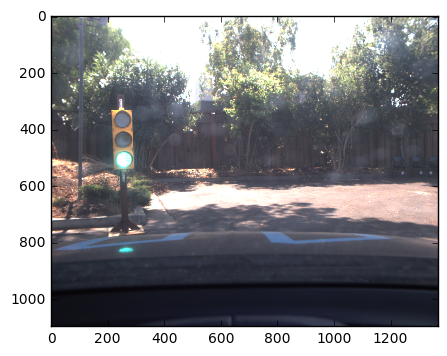

In [12]:
#img = cv2.imread('../training_data/download.png')
img = cv2.imread(source)

plt.imshow(bgr2rgb(img))
plt.show()

## Augmentation Functions

In [38]:
def bgr2rgb(img_bgr):
    b, g, r = cv2.split(img_bgr)
    img_rgb = cv2.merge([r, g, b])
    return img_rgb

def aug_brightness(img_in):
    """
    Augment picture in brightness
    :param img_in: image in BGR (openCV standard)
    :return: image in BGR, augmented in brightness
    """
    # Change to HSV color space and transform to float64 array
    img_out = cv2.cvtColor(img_in, cv2.COLOR_BGR2HSV)
    img_out = np.array(img_out, dtype=np.float64)
    # Set a random number for brightness adjustment and adjust
    rand_bright = 0.5 + np.random.uniform()
    img_out[:,:,2] = img_out[:,:,2] * rand_bright
    # set every value higher than 255 to 255
    img_out[:,:,2][img_out[:,:,2] > 255] = 255
    # Transform back (unit8 and BRG)
    img_out = np.array(img_out, dtype=np.uint8)
    img_out = cv2.cvtColor(img_out, cv2.COLOR_HSV2BGR)
    return img_out

def aug_shadow(img_in):
    # Random values according to image size
    width = np.shape(img_in)[1]
    height = np.shape(img_in)[0]
    top_y = width * np.random.uniform()
    bot_y = width * np.random.uniform()
    top_x = 0
    bot_x = height
    
    # Color space and mask
    img_hls = cv2.cvtColor(img_in, cv2.COLOR_BGR2HLS)
    
    shadow_mask = 0 * img_hls[:,:,1]
    X_m = np.mgrid[:height, :width][0]
    Y_m = np.mgrid[:height, :width][1]
    shadow_mask[((X_m - top_x)*(bot_y - top_y) - (bot_x - top_x) * (Y_m - top_y)) >= 0] = 1
    
    # Augment
    # Random bright .25 and .75
    rand_bright = np.random.randint(low=2, high=7) / 8

    cond1 = shadow_mask == 1
    cond0 = shadow_mask == 0
    if np.random.randint(2) == 1:
        img_hls[:,:,1][cond1] = img_hls[:,:,1][cond1]*rand_bright
    else:
        img_hls[:,:,1][cond0] = img_hls[:,:,1][cond0]*rand_bright
    
    # Transform back to BGR Color Space
    img_out = cv2.cvtColor(img_hls, cv2.COLOR_HLS2BGR)
    
    return img_out
        
def aug_blur(img_in):
    rand_kernel_size = np.random.randint(low=5, high=21)
    #print("Blur kernel size: {}".format(rand_kernel_size))
    rand_kernel = (rand_kernel_size, rand_kernel_size)
    
    return cv2.blur(img_in, rand_kernel)

## Examples

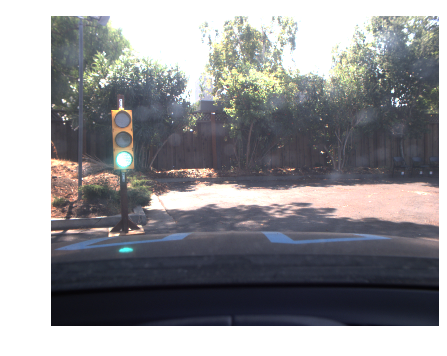

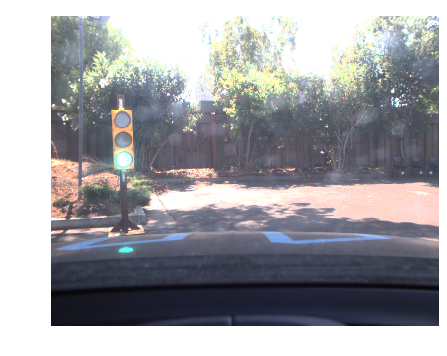

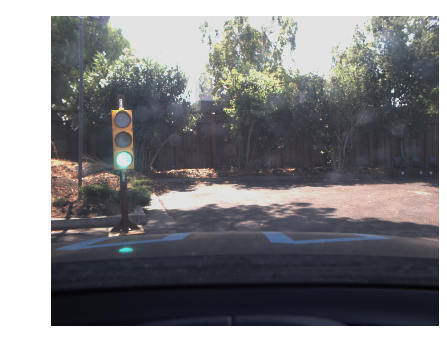

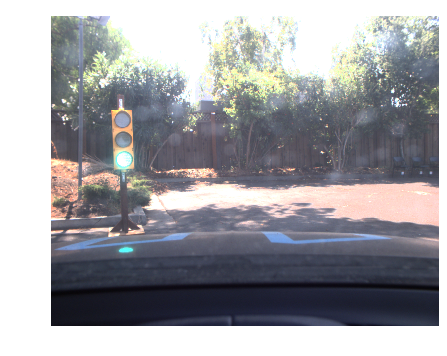

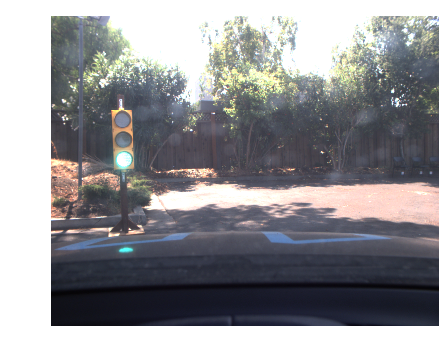

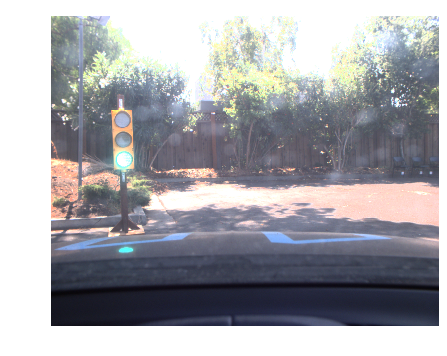

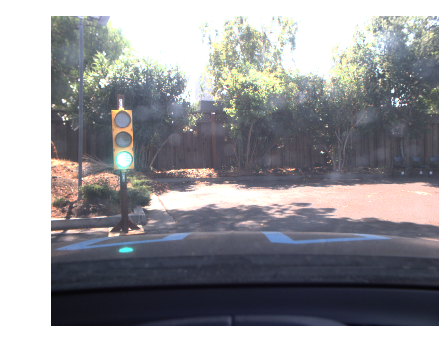

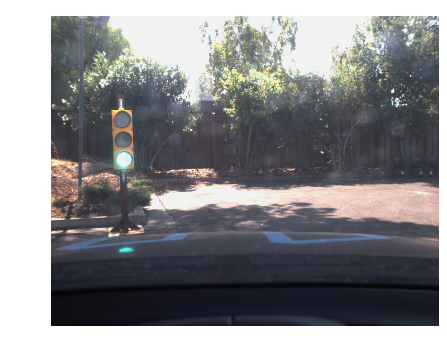

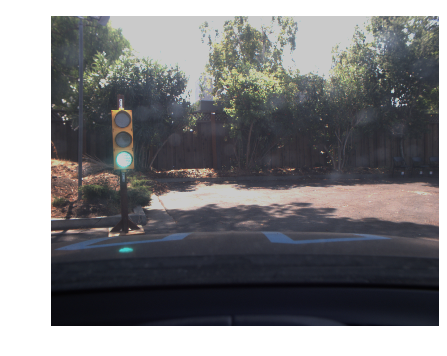

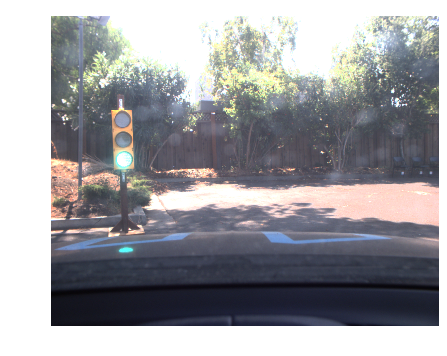

In [34]:
# Brightness Augmentation
for i in range(10):
    plt.imshow(bgr2rgb(aug_brightness(img)))
    plt.axis('off')
    plt.show()

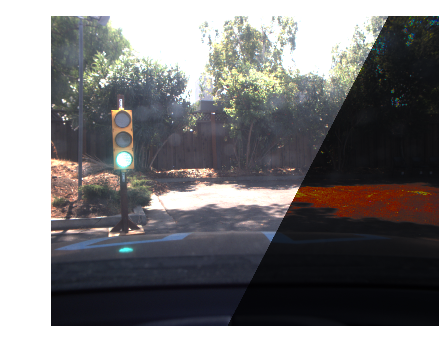

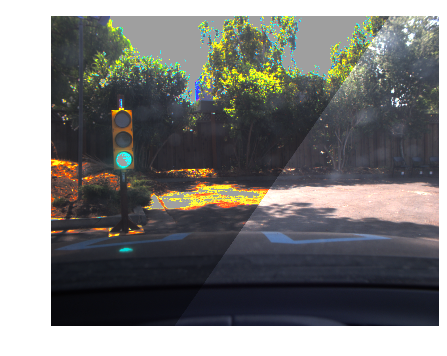

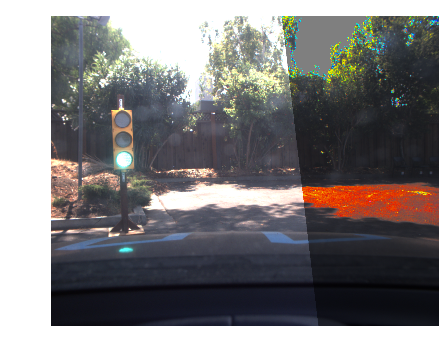

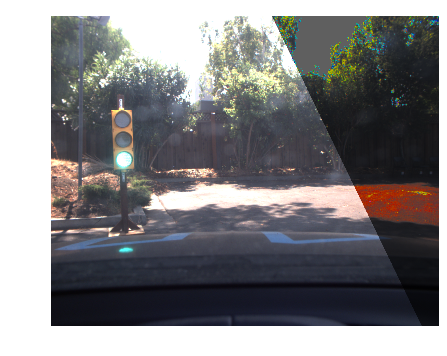

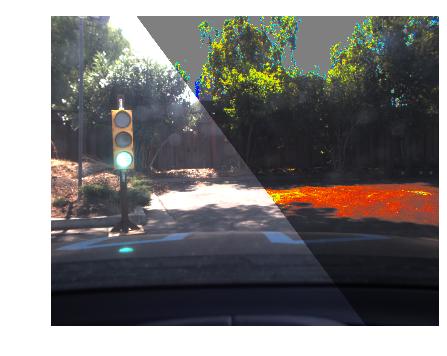

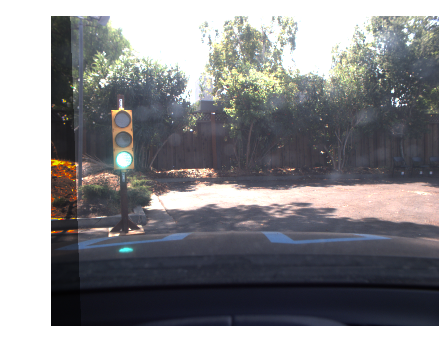

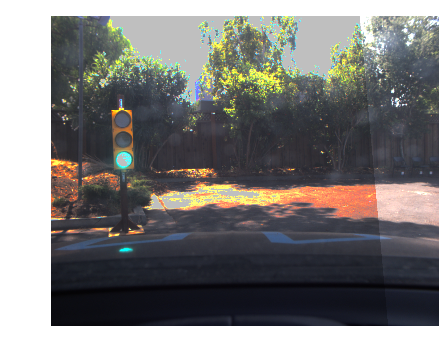

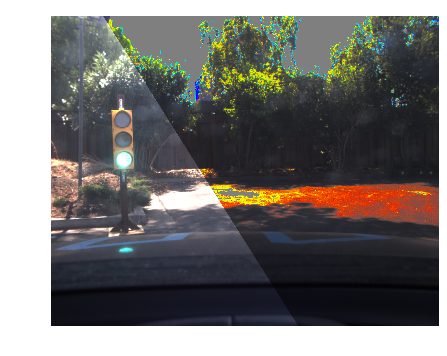

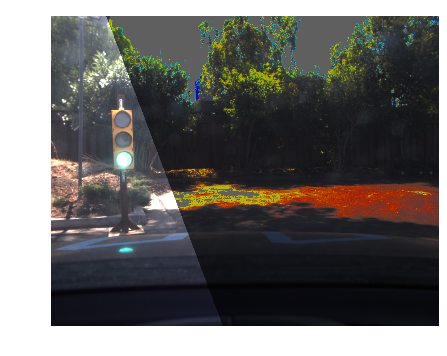

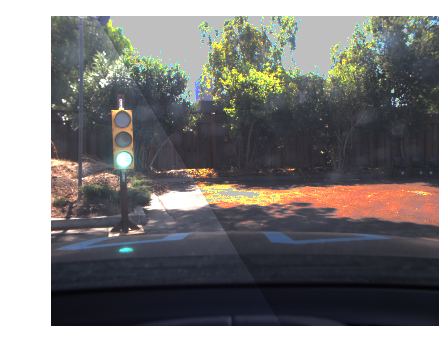

In [39]:
# Shadow Augmentation
for i in range(10):
    plt.imshow(bgr2rgb(aug_shadow(img)))
    plt.axis('off')
    plt.show()

Blur kernel size: 13


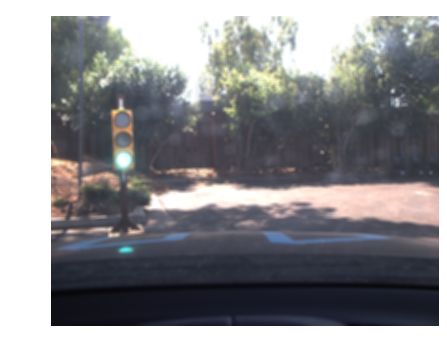

Blur kernel size: 9


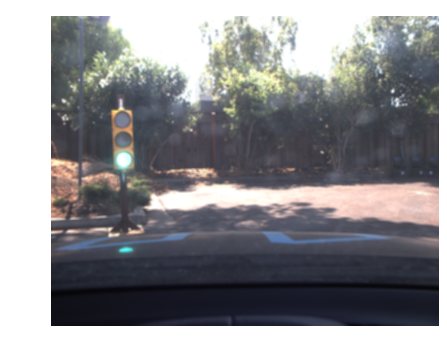

Blur kernel size: 5


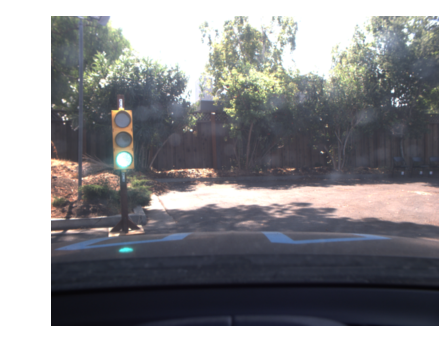

Blur kernel size: 15


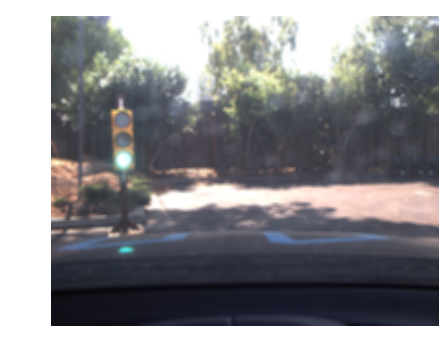

Blur kernel size: 8


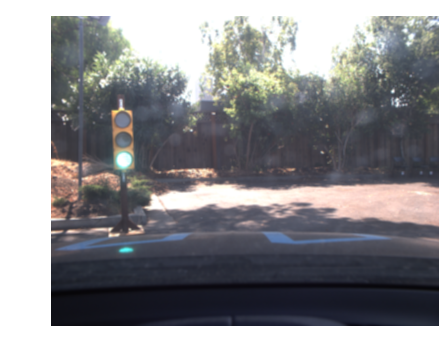

Blur kernel size: 18


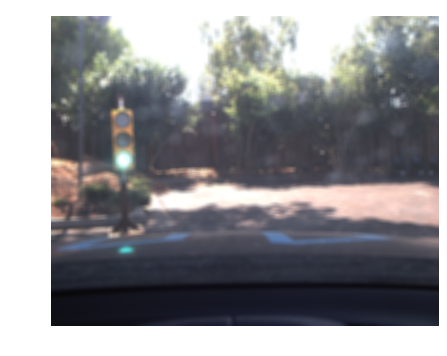

Blur kernel size: 20


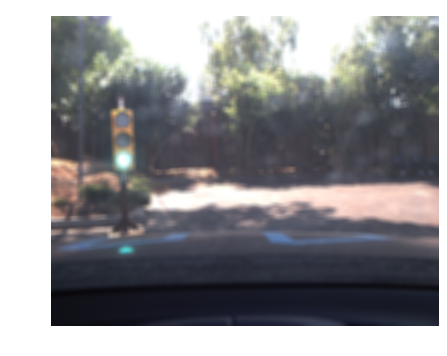

Blur kernel size: 15


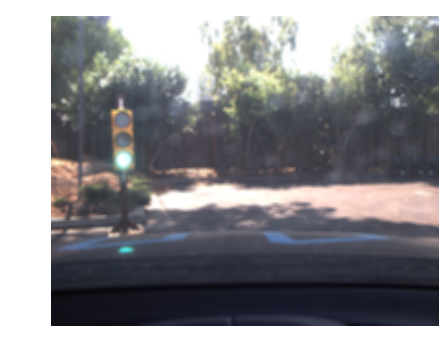

Blur kernel size: 15


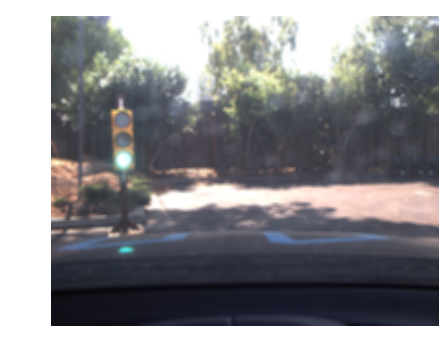

Blur kernel size: 17


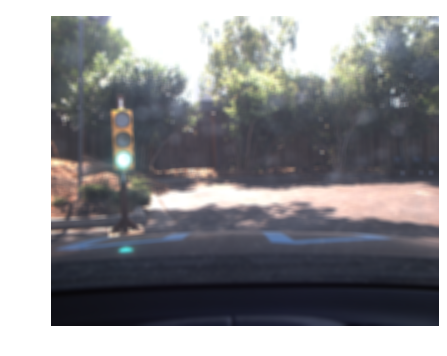

In [36]:
# Blur Augmentation
plt.figure()
for i in range(10):
    plt.imshow(bgr2rgb(aug_blur(img)))
    plt.axis('off')
    plt.show()